In [14]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

In [15]:
# サンプルデータ生成
# 各位置に対して、複数のWiFiアクセスポイントの信号強度データを収集したと仮定する
np.random.seed(0)
num_samples = 100
num_features = 2  # 2D空間での信号強度データ
num_locations = 3  # 位置の数

# 各位置ごとに信号強度データを生成
data = []
labels = []
for location in range(num_locations):
    for _ in range(num_samples):
        signal_strength = np.random.normal(loc=location * 5, scale=2, size=num_features)
        data.append(signal_strength)
        labels.append(location)

data = np.array(data)
labels = np.array(labels)

data, labels

(array([[ 3.52810469,  0.80031442],
        [ 1.95747597,  4.4817864 ],
        [ 3.73511598, -1.95455576],
        [ 1.90017684, -0.30271442],
        [-0.2064377 ,  0.821197  ],
        [ 0.28808714,  2.90854701],
        [ 1.52207545,  0.24335003],
        [ 0.88772647,  0.66734865],
        [ 2.98815815, -0.41031653],
        [ 0.6261354 , -1.70819148],
        [-5.10597963,  1.30723719],
        [ 1.7288724 , -1.48433004],
        [ 4.53950925, -2.90873135],
        [ 0.09151703, -0.3743677 ],
        [ 3.06555843,  2.93871754],
        [ 0.30989485,  0.75632504],
        [-1.7755715 , -3.96159294],
        [-0.6958243 ,  0.31269794],
        [ 2.46058136,  2.4047597 ],
        [-0.77465363, -0.6046055 ],
        [-2.09710593, -2.84003587],
        [-3.41254038,  3.90155079],
        [-1.01930436, -0.8761486 ],
        [-2.50559072,  1.55498071],
        [-3.2277957 , -0.42548056],
        [-1.79093312,  0.773805  ],
        [-1.02161028, -2.36126437],
        [-0.05636446,  0.856

In [16]:
# GMMモデルの構築と訓練
gmm = GaussianMixture(n_components=num_locations, random_state=0)
gmm.fit(data)

# グリッド上でGMMの確率密度関数を計算
x = np.linspace(-10, 20, 100)
y = np.linspace(-10, 20, 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

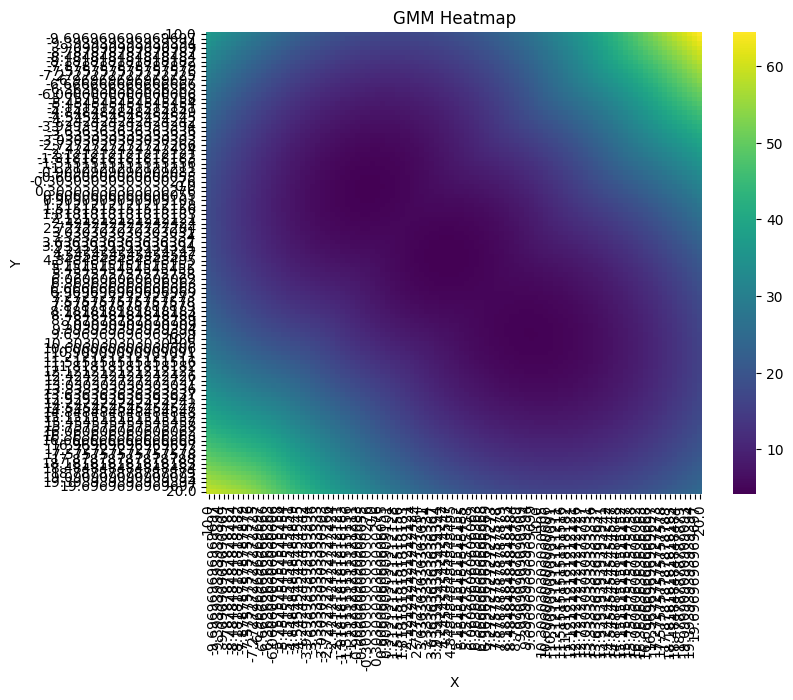

In [17]:
# ヒートマップのプロット
plt.figure(figsize=(8, 6))
sns.heatmap(Z, xticklabels=x, yticklabels=y, cmap="viridis")
plt.title("GMM Heatmap")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()